In [12]:
from sklearn.datasets import fetch_openml
mnist=fetch_openml('mnist_784',as_frame=False)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [13]:
x,y=mnist["data"],mnist["target"]

In [14]:
print(x.shape)

(70000, 784)


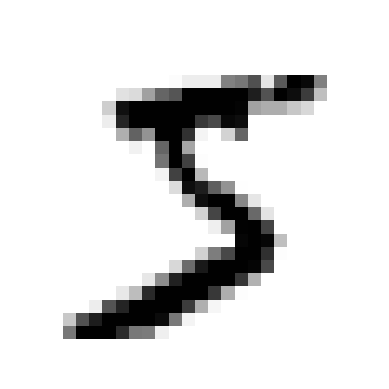

In [16]:
import matplotlib
import matplotlib.pyplot as plt
some_digit = x[0]
some_digit_image=some_digit.reshape(28,28)
plt.imshow(some_digit_image,cmap=matplotlib.cm.binary)
plt.axis("off")
plt.show()


In [20]:
x_train,x_test,y_train,y_test=x[:60000],x[60000:],y[:60000],y[60000:]
print(y_train)

['5' '0' '4' ... '5' '6' '8']


In [23]:
import numpy as np
print(y_train)
y_train_5=(y_train==5)
print(y_train_5)
y_test_5=(y_test==5)
print(y_test_5)


[5 0 4 ... 5 6 8]
[ True False False ...  True False False]
[False False False ... False False False]


In [ ]:
from sklearn.linear_model import SGDClassifier
sgd_clf=SGDClassifier(random_state=42)

In [ ]:
sgd_clf.fit(x_train,y_train_5)

SGDClassifier(random_state=42)

In [ ]:
sgd_clf.predict([some_digit])

array([ True])

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, x_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [ ]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, x_train, y_train_5, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)


array([[53892,   687],
       [ 1891,  3530]])

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)


0.8370879772350012

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343846